In [252]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Data

In [187]:
train = pd.read_csv('/content/drive/MyDrive/Flatiron/Capstone/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Flatiron/Capstone/Test.csv')

train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


(array([3.736e+03, 1.110e+02, 1.300e+01, 4.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([4.00000e+00, 1.68360e+03, 3.36320e+03, 5.04280e+03, 6.72240e+03,
        8.40200e+03, 1.00816e+04, 1.17612e+04, 1.34408e+04, 1.51204e+04,
        1.68000e+04]),
 <BarContainer object of 10 artists>)

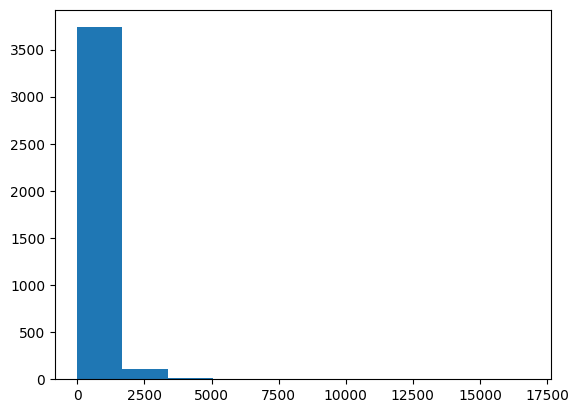

In [188]:
plt.hist(train.Yield, bins = 10)

In [ ]:
train.info()

In [190]:
train.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,...,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,1453.000000,1196.000000,3870.000000,...,2166.000000,3314.000000,3314.000000,1176.000000,1170.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,29.731590,57.445652,2.184496,...,13.351801,11.513881,29.200362,7.375000,58.764957,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,122.680882,328.251615,0.634632,...,9.701597,8.715856,12.139109,5.932502,11.356588,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,...,7.000000,6.000000,23.000000,4.000000,58.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,3.000000,2.000000,2.000000,...,10.000000,10.000000,28.000000,6.000000,60.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,4.000000,5.000000,3.000000,...,16.000000,15.000000,36.000000,10.000000,65.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,1400.000000,4000.000000,4.000000,...,90.000000,90.000000,332.000000,67.000000,97.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


In [ ]:
train.isna().sum()

## Filling NANs




2.0      1804
1.0       860
3.0       509
4.0       468
5.0        62
8.0        41
10.0       32
6.0        24
7.0        11
9.0        11
12.0       10
14.0       10
11.0        5
16.0        5
13.0        5
20.0        4
18.0        4
15.0        2
442.0       1
22.0        1
19.0        1
Name: SeedlingsPerPit, dtype: int64

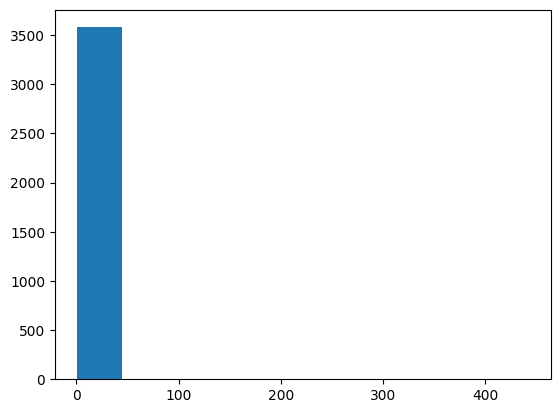

In [192]:
train[train['SeedlingsPerPit'].isna()]
plt.hist(train['SeedlingsPerPit'])
train['SeedlingsPerPit'] = train['SeedlingsPerPit'].fillna(train['SeedlingsPerPit'].median())
train['SeedlingsPerPit'].value_counts()

In [193]:
train['NursDetFactor'] = train['NursDetFactor'].fillna('Unknown')
train['TransDetFactor'] = train['TransDetFactor'].fillna('Unknown')

In [194]:
train['TransplantingIrrigationHours'] = train['TransplantingIrrigationHours'].fillna(train['TransplantingIrrigationHours'].median())
train['TransplantingIrrigationSource'] = train['TransplantingIrrigationSource'].fillna('Unknown')
train['TransplantingIrrigationPowerSource'] = train['TransplantingIrrigationPowerSource'].fillna('Unknown')

In [ ]:
train.isna().sum()

In [ ]:
plt.hist(train['TransIrriCost'])
plt.hist(train['StandingWater'])


train['TransIrriCost'] = train['TransIrriCost'].fillna(train['TransIrriCost'].median())
train['StandingWater'] = train['StandingWater'].fillna(train['StandingWater'].median())

train = train.drop(columns = ['Ganaura', 'OrgFertilizers', 'CropOrgFYM', 'PCropSolidOrgFertAppMethod', 'BasalUrea', 'BasalDAP', '1tdUrea', '1appDaysUrea','2tdUrea', '2appDaysUrea'])

In [ ]:
train.isna().sum()

In [198]:
train['CropbasalFerts'] = train['CropbasalFerts'].fillna('Unknown')
train['FirstTopDressFert'] = train['FirstTopDressFert'].fillna('Unknown')
train['MineralFertAppMethod.1'] = train['MineralFertAppMethod.1'].fillna('Unknown')
train['RcNursEstDate'] = train['RcNursEstDate'].fillna('Unknown')


train['Harv_hand_rent'] = train['Harv_hand_rent'].fillna(train['Harv_hand_rent'].median())

In [199]:
train.isna().sum()

ID                                    0
District                              0
Block                                 0
CultLand                              0
CropCultLand                          0
LandPreparationMethod                 0
CropTillageDate                       0
CropTillageDepth                      0
CropEstMethod                         0
RcNursEstDate                         0
SeedingSowingTransplanting            0
SeedlingsPerPit                       0
NursDetFactor                         0
TransDetFactor                        0
TransplantingIrrigationHours          0
TransplantingIrrigationSource         0
TransplantingIrrigationPowerSource    0
TransIrriCost                         0
StandingWater                         0
NoFertilizerAppln                     0
CropbasalFerts                        0
MineralFertAppMethod                  0
FirstTopDressFert                     0
MineralFertAppMethod.1                0
Harv_method                           0


## Split Into Categorical and Numerical

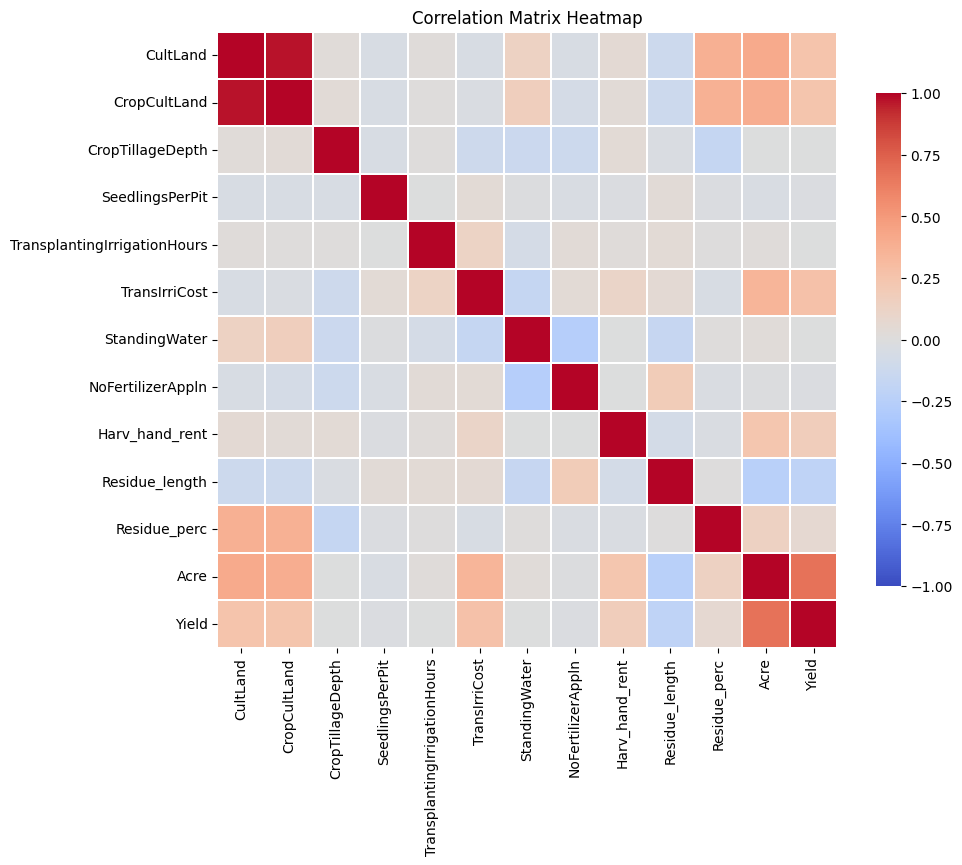

In [200]:
train_num = train.select_dtypes(include=['number'])
train_cat = train.select_dtypes(include=['object'])
corr = train_num.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f",
            linewidths=.05, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [201]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ID                                  3870 non-null   object
 1   District                            3870 non-null   object
 2   Block                               3870 non-null   object
 3   LandPreparationMethod               3870 non-null   object
 4   CropTillageDate                     3870 non-null   object
 5   CropEstMethod                       3870 non-null   object
 6   RcNursEstDate                       3870 non-null   object
 7   SeedingSowingTransplanting          3870 non-null   object
 8   NursDetFactor                       3870 non-null   object
 9   TransDetFactor                      3870 non-null   object
 10  TransplantingIrrigationSource       3870 non-null   object
 11  TransplantingIrrigationPowerSource  3870 non-null   obje

## Categorical Grouping

In [202]:
train_cat.District.value_counts()

Nalanda     1193
Jamui       1127
Vaishali     980
Gaya         570
Name: District, dtype: int64

In [203]:
train_cat.Block.value_counts()

Rajgir        850
Jamui         626
Mahua         607
Khaira        500
Gurua         358
Noorsarai     343
Chehrakala    239
Wazirganj     213
Garoul        134
Name: Block, dtype: int64

In [204]:
prep_vals =list(train_cat.LandPreparationMethod.unique())

In [205]:
def group_by_length(list):
    length_dict = {}
    for string in list:
        length = len(string)
        if length not in length_dict:
            length_dict[length] = [string]
        else:
            length_dict[length].append(string)
    return length_dict

group_by_length(prep_vals)



{36: ['TractorPlough FourWheelTracRotavator',
  'FourWheelTracRotavator TractorPlough',
  'FourWheelTracRotavator BullockPlough'],
 55: ['WetTillagePuddling TractorPlough FourWheelTracRotavator',
  'TractorPlough WetTillagePuddling FourWheelTracRotavator',
  'WetTillagePuddling FourWheelTracRotavator TractorPlough',
  'TractorPlough FourWheelTracRotavator WetTillagePuddling',
  'FourWheelTracRotavator TractorPlough WetTillagePuddling',
  'FourWheelTracRotavator WetTillagePuddling TractorPlough'],
 32: ['TractorPlough WetTillagePuddling',
  'WetTillagePuddling TractorPlough',
  'BullockPlough WetTillagePuddling'],
 13: ['TractorPlough', 'BullockPlough'],
 22: ['FourWheelTracRotavator'],
 18: ['WetTillagePuddling'],
 27: ['TractorPlough BullockPlough', 'BullockPlough TractorPlough'],
 69: ['WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
  'WetTillagePuddling FourWheelTracRotavator BullockPlough TractorPlough',
  'WetTillagePuddling BullockPlough TractorPlough Fou

In [206]:
prep_dict = {'TractorPlough FourWheelTracRotavator': 'TractorPlough FourWheelTracRotavator',
             'FourWheelTracRotavator TractorPlough': 'TractorPlough FourWheelTracRotavator',
             'TractorPlough WetTillagePuddling FourWheelTracRotavator': 'WetTillagePuddling TractorPlough FourWheelTracRotavator',
             'WetTillagePuddling FourWheelTracRotavator TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator',
             'TractorPlough FourWheelTracRotavator WetTillagePuddling': 'WetTillagePuddling TractorPlough FourWheelTracRotavator',
             'FourWheelTracRotavator TractorPlough WetTillagePuddling': 'WetTillagePuddling TractorPlough FourWheelTracRotavator',
             'FourWheelTracRotavator WetTillagePuddling TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator',
             'WetTillagePuddling TractorPlough': 'TractorPlough WetTillagePuddling',
             'WetTillagePuddling FourWheelTracRotavator BullockPlough TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'WetTillagePuddling BullockPlough TractorPlough FourWheelTracRotavator': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'BullockPlough TractorPlough WetTillagePuddling FourWheelTracRotavator': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'WetTillagePuddling FourWheelTracRotavator TractorPlough BullockPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'TractorPlough WetTillagePuddling FourWheelTracRotavator BullockPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'WetTillagePuddling TractorPlough BullockPlough FourWheelTracRotavator': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'BullockPlough FourWheelTracRotavator TractorPlough WetTillagePuddling': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'WetTillagePuddling BullockPlough FourWheelTracRotavator TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'FourWheelTracRotavator BullockPlough WetTillagePuddling TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'FourWheelTracRotavator WetTillagePuddling BullockPlough TractorPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'TractorPlough WetTillagePuddling BullockPlough FourWheelTracRotavator': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'TractorPlough FourWheelTracRotavator BullockPlough WetTillagePuddling': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'TractorPlough FourWheelTracRotavator WetTillagePuddling BullockPlough': 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough',
             'TractorPlough WetTillagePuddling BullockPlough': 'WetTillagePuddling TractorPlough BullockPlough',
             'WetTillagePuddling BullockPlough TractorPlough': 'WetTillagePuddling TractorPlough BullockPlough',
             'TractorPlough BullockPlough WetTillagePuddling': 'WetTillagePuddling TractorPlough BullockPlough',
             'BullockPlough TractorPlough WetTillagePuddling': 'WetTillagePuddling TractorPlough BullockPlough',
             'WetTillagePuddling FourWheelTracRotavator': 'FourWheelTracRotavator WetTillagePuddling',
             'Other': 'Other'
             }

In [207]:
train_cat['LandPreparationMethod'] = train_cat['LandPreparationMethod'].replace(prep_dict)

len(list(train['LandPreparationMethod'].unique()))

43

In [208]:
train_cat['TractorPlough'] = train_cat.LandPreparationMethod.apply(lambda x: 1 if 'TractorPlough' in x else 0)
train_cat['WetTillagePuddling'] = train_cat.LandPreparationMethod.apply(lambda x: 1 if 'WetTillagePuddling' in x else 0)
train_cat['FourWheelTracRotavator'] = train_cat.LandPreparationMethod.apply(lambda x: 1 if 'FourWheelTracRotavator' in x else 0)
train_cat['BullockPlough'] = train_cat.LandPreparationMethod.apply(lambda x: 1 if 'BullockPlough' in x else 0)
train_cat['Other'] = train_cat.LandPreparationMethod.apply(lambda x: 1 if 'Other' in x else 0)

train_cat = train_cat.drop(columns = ['LandPreparationMethod'])

In [209]:

train_cat.CropEstMethod.value_counts()

Manual_PuddledRandom      3346
Manual_PuddledLine         235
LineSowingAfterTillage     206
Broadcasting                83
Name: CropEstMethod, dtype: int64

In [210]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ID                                  3870 non-null   object
 1   District                            3870 non-null   object
 2   Block                               3870 non-null   object
 3   CropTillageDate                     3870 non-null   object
 4   CropEstMethod                       3870 non-null   object
 5   RcNursEstDate                       3870 non-null   object
 6   SeedingSowingTransplanting          3870 non-null   object
 7   NursDetFactor                       3870 non-null   object
 8   TransDetFactor                      3870 non-null   object
 9   TransplantingIrrigationSource       3870 non-null   object
 10  TransplantingIrrigationPowerSource  3870 non-null   object
 11  CropbasalFerts                      3870 non-null   obje

In [211]:
train_cat.NursDetFactor.value_counts()

CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability    560
CalendarDate IrrigWaterAvailability                                                          379
CalendarDate                                                                                 324
CalendarDate IrrigWaterAvailability SeedAvailability                                         306
Unknown                                                                                      289
                                                                                            ... 
IrrigWaterAvailability CalendarDate PreMonsoonShowers LabourAvailability                       1
LabourAvailability SeedAvailability IrrigWaterAvailability PreMonsoonShowers                   1
CalendarDate PreMonsoonShowers SeedAvailability IrrigWaterAvailability LabourAvailability      1
CalendarDate SeedAvailability PreMonsoonShowers IrrigWaterAvailability                         1
LabourAvailability IrrigWaterA

In [212]:
group_by_length(list(train_cat.NursDetFactor.unique()))

{52: ['CalendarDate IrrigWaterAvailability SeedAvailability',
  'CalendarDate SeedAvailability IrrigWaterAvailability',
  'IrrigWaterAvailability CalendarDate SeedAvailability',
  'IrrigWaterAvailability SeedAvailability CalendarDate',
  'SeedAvailability IrrigWaterAvailability CalendarDate',
  'SeedAvailability CalendarDate IrrigWaterAvailability'],
 89: ['CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability',
  'CalendarDate PreMonsoonShowers LabourAvailability IrrigWaterAvailability SeedAvailability',
  'CalendarDate PreMonsoonShowers IrrigWaterAvailability SeedAvailability LabourAvailability',
  'CalendarDate PreMonsoonShowers LabourAvailability SeedAvailability IrrigWaterAvailability',
  'CalendarDate IrrigWaterAvailability LabourAvailability SeedAvailability PreMonsoonShowers',
  'IrrigWaterAvailability LabourAvailability SeedAvailability PreMonsoonShowers CalendarDate',
  'CalendarDate IrrigWaterAvailability PreMonsoonShowers LabourAvailabili

In [213]:
train_cat['Nurs_CalendarDate'] = train_cat.NursDetFactor.apply(lambda x: 1 if 'CalendarDate' in x else 0)
train_cat['Nurs_PreMonsoonShowers'] = train_cat.NursDetFactor.apply(lambda x: 1 if 'PreMonsoonShowers' in x else 0)
train_cat['Nurs_LabourAvailability'] = train_cat.NursDetFactor.apply(lambda x: 1 if 'LabourAvailability' in x else 0)
train_cat['Nurs_IrrigWaterAvailability'] = train_cat.NursDetFactor.apply(lambda x: 1 if 'IrrigWaterAvailability' in x else 0)
train_cat['Nurs_SeedAvailability'] = train_cat.NursDetFactor.apply(lambda x: 1 if 'SeedAvailability' in x else 0)
train_cat['Nurs_Unknown'] = train_cat.NursDetFactor.apply(lambda x: 1 if 'Unknown' in x else 0)


train_cat = train_cat.drop(columns = ['NursDetFactor'])

In [214]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ID                                  3870 non-null   object
 1   District                            3870 non-null   object
 2   Block                               3870 non-null   object
 3   CropTillageDate                     3870 non-null   object
 4   CropEstMethod                       3870 non-null   object
 5   RcNursEstDate                       3870 non-null   object
 6   SeedingSowingTransplanting          3870 non-null   object
 7   TransDetFactor                      3870 non-null   object
 8   TransplantingIrrigationSource       3870 non-null   object
 9   TransplantingIrrigationPowerSource  3870 non-null   object
 10  CropbasalFerts                      3870 non-null   object
 11  MineralFertAppMethod                3870 non-null   obje

In [215]:
group_by_length(list(train_cat['TransDetFactor'].unique()))



{77: ['CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability',
  'CalendarDate RainArrival IrrigWaterAvailability LaborAvailability SeedlingAge',
  'SeedlingAge CalendarDate RainArrival IrrigWaterAvailability LaborAvailability',
  'CalendarDate SeedlingAge RainArrival LaborAvailability IrrigWaterAvailability',
  'CalendarDate SeedlingAge IrrigWaterAvailability LaborAvailability RainArrival',
  'CalendarDate IrrigWaterAvailability RainArrival SeedlingAge LaborAvailability',
  'LaborAvailability IrrigWaterAvailability RainArrival SeedlingAge CalendarDate',
  'RainArrival IrrigWaterAvailability LaborAvailability SeedlingAge CalendarDate',
  'SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability CalendarDate',
  'CalendarDate SeedlingAge IrrigWaterAvailability RainArrival LaborAvailability',
  'CalendarDate RainArrival LaborAvailability SeedlingAge IrrigWaterAvailability',
  'CalendarDate IrrigWaterAvailability LaborAvailability SeedlingAge RainArrival',


In [216]:
train_cat['Trans_CalendarDate'] = train_cat.TransDetFactor.apply(lambda x: 1 if 'CalendarDate' in x else 0)
train_cat['Trans_PreMonsoonShowers'] = train_cat.TransDetFactor.apply(lambda x: 1 if 'PreMonsoonShowers' in x else 0)
train_cat['Trans_LabourAvailability'] = train_cat.TransDetFactor.apply(lambda x: 1 if 'LabourAvailability' in x else 0)
train_cat['Trans_IrrigWaterAvailability'] = train_cat.TransDetFactor.apply(lambda x: 1 if 'IrrigWaterAvailability' in x else 0)
train_cat['Trans_SeedAvailability'] = train_cat.TransDetFactor.apply(lambda x: 1 if 'SeedAvailability' in x else 0)
train_cat['Trans_Unknown'] = train_cat.TransDetFactor.apply(lambda x: 1 if 'Unknown' in x else 0)


train_cat = train_cat.drop(columns = ['TransDetFactor'])

In [217]:
train_cat.TransplantingIrrigationSource.value_counts()

Boring      3228
Canal        373
Unknown      115
Rainfed      103
Pond          36
TubeWell      12
Well           3
Name: TransplantingIrrigationSource, dtype: int64

In [218]:
train_cat.TransplantingIrrigationPowerSource.value_counts()

Electric    2645
Diesel       720
Unknown      503
Solar          2
Name: TransplantingIrrigationPowerSource, dtype: int64

In [219]:
train_cat.CropbasalFerts.value_counts()

DAP Urea             1640
DAP                  1379
Urea                  308
Unknown               188
Urea DAP              134
DAP Other              70
DAP Urea SSP           51
NPK                    29
DAP Urea NPKS          18
NPK Urea                8
Urea DAP SSP            7
Urea NPKS               6
Urea DAP NPKS           3
DAP NPKS                3
DAP SSP                 3
Urea NPKS DAP           3
DAP NPK Urea            2
DAP Urea NPK            1
Urea DAP MoP            1
SSP Urea                1
NPKS                    1
DAP NPKS Urea           1
NPKS DAP Urea           1
DAP Urea NPKS MoP       1
DAP NPKS Urea SSP       1
Urea SSP                1
Urea NPK                1
DAP NPKS Other          1
NPK DAP Urea            1
DAP Urea SSP MoP        1
DAP MoP                 1
DAP Urea NPKS SSP       1
DAP Urea MoP            1
Urea SSP DAP            1
Urea Other DAP          1
Name: CropbasalFerts, dtype: int64

In [220]:
train_cat['DAP'] = train_cat.CropbasalFerts.apply(lambda x: 1 if 'DAP' in x else 0)
train_cat['MoP'] = train_cat.CropbasalFerts.apply(lambda x: 1 if 'MoP' in x else 0)
train_cat['NPKS'] = train_cat.CropbasalFerts.apply(lambda x: 1 if 'NPKS' in x else 0)
train_cat['Other'] = train_cat.CropbasalFerts.apply(lambda x: 1 if 'Other' in x else 0)
train_cat['SSP'] = train_cat.CropbasalFerts.apply(lambda x: 1 if 'SSP' in x else 0)
train_cat['Urea'] = train_cat.CropbasalFerts.apply(lambda x: 1 if 'Urea' in x else 0)

train_cat = train_cat.drop(columns = ['CropbasalFerts'])

In [221]:
train_cat.MineralFertAppMethod.value_counts()

Broadcasting       3214
SoilApplied         638
RootApplication      18
Name: MineralFertAppMethod, dtype: int64

In [222]:
train_cat.FirstTopDressFert.value_counts()

Urea            2798
Unknown          485
DAP Urea         322
Urea DAP         177
DAP               64
NPKS Urea          6
Urea NPKS          5
NPK                3
DAP NPKS           3
NPK Urea           2
DAP NPK Urea       1
Urea NPK           1
DAP NPK            1
Urea SSP           1
Other Urea         1
Name: FirstTopDressFert, dtype: int64

In [223]:
train_cat['TopDress_DAP'] = train_cat.FirstTopDressFert.apply(lambda x: 1 if 'DAP' in x else 0)
train_cat['TopDress_NPKS'] = train_cat.FirstTopDressFert.apply(lambda x: 1 if 'NPKS' in x else 0)
train_cat['TopDress_Other'] = train_cat.FirstTopDressFert.apply(lambda x: 1 if 'Other' in x else 0)
train_cat['TopDress_SSP'] = train_cat.FirstTopDressFert.apply(lambda x: 1 if 'SSP' in x else 0)
train_cat['TopDress_Urea'] = train_cat.FirstTopDressFert.apply(lambda x: 1 if 'Urea' in x else 0)

train_cat = train_cat.drop(columns = ['FirstTopDressFert'])

In [224]:
train_cat['MineralFertAppMethod.1'].value_counts()

Broadcasting       3288
Unknown             481
SoilApplied          64
RootApplication      37
Name: MineralFertAppMethod.1, dtype: int64

In [225]:
train_cat['Harv_method'].value_counts()

hand       3642
machine     228
Name: Harv_method, dtype: int64

In [226]:
train_cat['Threshing_method'].value_counts()

machine    2098
hand       1772
Name: Threshing_method, dtype: int64

In [227]:
train_cat['Stubble_use'].value_counts()

plowed_in_soil    3846
burned              24
Name: Stubble_use, dtype: int64

In [228]:
train_cat['Stubble_use'].value_counts()

plowed_in_soil    3846
burned              24
Name: Stubble_use, dtype: int64

In [229]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ID                                  3870 non-null   object
 1   District                            3870 non-null   object
 2   Block                               3870 non-null   object
 3   CropTillageDate                     3870 non-null   object
 4   CropEstMethod                       3870 non-null   object
 5   RcNursEstDate                       3870 non-null   object
 6   SeedingSowingTransplanting          3870 non-null   object
 7   TransplantingIrrigationSource       3870 non-null   object
 8   TransplantingIrrigationPowerSource  3870 non-null   object
 9   MineralFertAppMethod                3870 non-null   object
 10  MineralFertAppMethod.1              3870 non-null   object
 11  Harv_method                         3870 non-null   obje

## One Hot Encode

In [230]:
train_cat_ohe = train_cat.iloc[: , : 15]
train_cat_preOHE = train_cat.iloc[: , 16:]

train_cat_ohe = train_cat_ohe.drop(columns = ['CropTillageDate', 'RcNursEstDate','Harv_date', 'Threshing_date', 'SeedingSowingTransplanting' ])
train_cat_ohe.info()
id_column = train_cat_ohe['ID']
train_cat_preOHE = pd.concat([id_column, train_cat_preOHE], axis=1)
train_num = pd.concat([id_column, train_num], axis=1)
encoded_df = train_cat_ohe.drop(columns = ['ID'])
train_cat_preOHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ID                                  3870 non-null   object
 1   District                            3870 non-null   object
 2   Block                               3870 non-null   object
 3   CropEstMethod                       3870 non-null   object
 4   TransplantingIrrigationSource       3870 non-null   object
 5   TransplantingIrrigationPowerSource  3870 non-null   object
 6   MineralFertAppMethod                3870 non-null   object
 7   MineralFertAppMethod.1              3870 non-null   object
 8   Harv_method                         3870 non-null   object
 9   Threshing_method                    3870 non-null   object
dtypes: object(10)
memory usage: 302.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data col

In [231]:

ohe = OneHotEncoder(sparse=False)

encoded_data = ohe.fit_transform(encoded_df)

new_column_names = ohe.get_feature_names_out(input_features=encoded_df.columns)

train_cat_ohe = pd.DataFrame(encoded_data, columns=new_column_names, index=encoded_df.index)

train_cat_ohe = pd.concat([id_column, train_cat_ohe], axis=1)
print(train_cat_ohe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           3870 non-null   object 
 1   District_Gaya                                3870 non-null   float64
 2   District_Jamui                               3870 non-null   float64
 3   District_Nalanda                             3870 non-null   float64
 4   District_Vaishali                            3870 non-null   float64
 5   Block_Chehrakala                             3870 non-null   float64
 6   Block_Garoul                                 3870 non-null   float64
 7   Block_Gurua                                  3870 non-null   float64
 8   Block_Jamui                                  3870 non-null   float64
 9   Block_Khaira                                 3870 non-null   float64
 10  

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [232]:
train_cat_ohe.head()

,ID,District_Gaya,District_Jamui,District_Nalanda,District_Vaishali,Block_Chehrakala,Block_Garoul,Block_Gurua,Block_Jamui,Block_Khaira,...,MineralFertAppMethod_RootApplication,MineralFertAppMethod_SoilApplied,MineralFertAppMethod.1_Broadcasting,MineralFertAppMethod.1_RootApplication,MineralFertAppMethod.1_SoilApplied,MineralFertAppMethod.1_Unknown,Harv_method_hand,Harv_method_machine,Threshing_method_hand,Threshing_method_machine
0,ID_GTFAC7PEVWQ9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,ID_TK40ARLSPOKS,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,ID_1FJY2CRIMLZZ,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,ID_I3IPXS4DB7NE,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,ID_4T8YQWXWHB4A,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [233]:
train_cat_ohe = pd.merge(train_cat_ohe, train_cat_preOHE)
train_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3870 entries, 0 to 3869
Data columns (total 67 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           3870 non-null   object 
 1   District_Gaya                                3870 non-null   float64
 2   District_Jamui                               3870 non-null   float64
 3   District_Nalanda                             3870 non-null   float64
 4   District_Vaishali                            3870 non-null   float64
 5   Block_Chehrakala                             3870 non-null   float64
 6   Block_Garoul                                 3870 non-null   float64
 7   Block_Gurua                                  3870 non-null   float64
 8   Block_Jamui                                  3870 non-null   float64
 9   Block_Khaira                                 3870 non-null   float64
 10  

In [234]:
train = pd.merge(train_cat_ohe, train_num)

## Simple Linear Regression

In [235]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

pipe = Pipeline([('mms', MinMaxScaler()), ('linreg', LinearRegression())])

X_train = train.drop(columns = ['ID', 'Yield'])
y = train['Yield']

pipe.fit(X_train, y)





Pipeline(steps=[('mms', MinMaxScaler()), ('linreg', LinearRegression())])

In [237]:
pipe.score(X_train, y)

0.47667984371249106

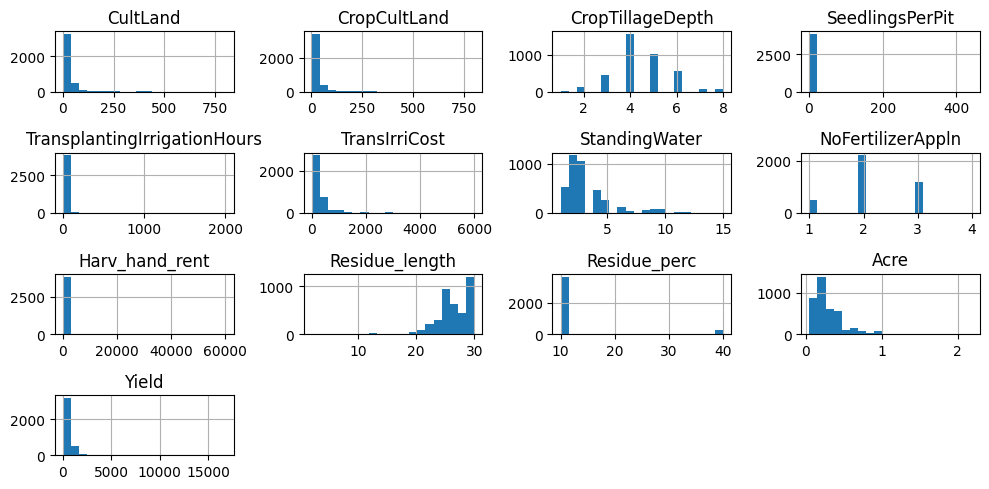

In [238]:
train_num.hist(bins = 20, figsize=(10, 5))

plt.tight_layout()
plt.show()

## Log Transform Skewed Numerical Data

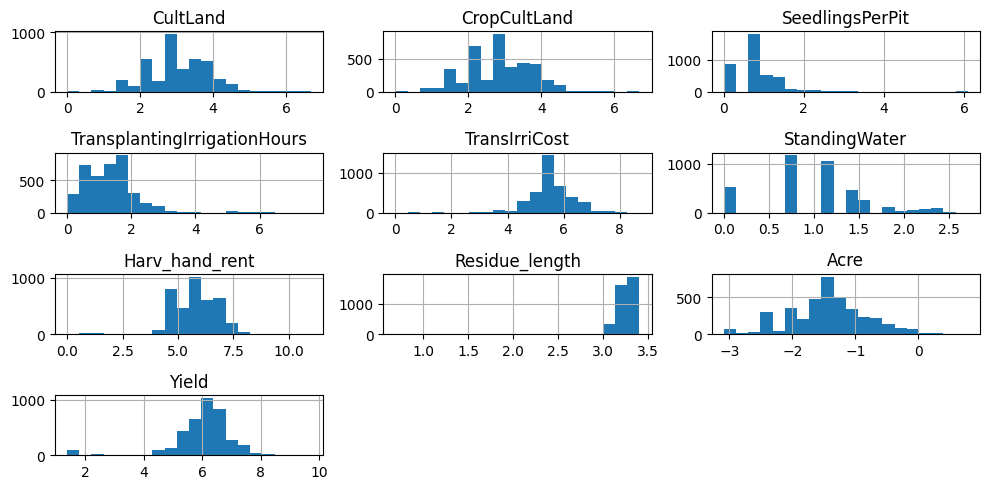

In [239]:
columns_to_transform = ['CultLand', 'CropCultLand', 'SeedlingsPerPit', 'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
                        'Harv_hand_rent', 'Residue_length', 'Acre', 'Yield']

# Perform log transformation
train_num_log = train_num[columns_to_transform].apply(np.log)

train_num_log.hist(bins = 20, figsize=(10, 5))

plt.tight_layout()
plt.show()


In [240]:
train_num_log.head()

,CultLand,CropCultLand,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Harv_hand_rent,Residue_length,Acre,Yield
0,3.806662,3.688879,0.693147,1.609438,5.298317,0.693147,5.991465,3.401197,-1.163151,6.396930
1,3.258097,3.258097,0.693147,1.609438,4.828314,1.098612,1.098612,3.178054,-1.163151,6.396930
2,2.302585,2.302585,0.693147,1.386294,4.382027,0.693147,6.173786,3.401197,-1.909543,5.416100
3,2.708050,2.708050,0.693147,1.386294,5.521461,1.098612,5.480639,3.258097,-1.504077,6.148468
4,4.094345,4.094345,0.693147,2.197225,5.703782,0.693147,5.991465,3.178054,-0.757686,6.309918


## Linear Regression with Log Transformation

In [241]:
pipe_log = Pipeline([('ss', StandardScaler()), ('linreg', LinearRegression())])


In [242]:
train_num_log = pd.concat([id_column, train_num_log], axis=1)
train_log = pd.merge(train_cat_ohe, train_num_log)

X_train_log = train.drop(columns = ['ID', 'Yield'])
y = train['Yield']

pipe.fit(X_train_log, y)


Pipeline(steps=[('mms', MinMaxScaler()), ('linreg', LinearRegression())])

In [243]:
pipe.fit(X_train_log, y)
pipe.score(X_train_log, y)

0.47667984371249106

In [244]:
pipe_log.fit(X_train_log, y)
pipe_log.score(X_train_log, y)

0.4860376683551211

## Lasso Regression

In [245]:
pipe_log_lasso = Pipeline([('ss', StandardScaler()), ('Lasso', Lasso(alpha = 0.5))])



In [246]:
pipe_log_lasso.fit(X_train_log, y)

Pipeline(steps=[('ss', StandardScaler()), ('Lasso', Lasso(alpha=0.5))])

In [247]:
pipe_log_lasso.score(X_train_log, y)

0.4878977093458947

## Random Forest

In [248]:
regressor = RandomForestRegressor(n_estimators=10, random_state=42, oob_score=True)

regressor.fit(X_train_log, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=42)

In [249]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X_train_log)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.1616779432134925
Mean Squared Error: 47180.712153628985
R-squared: 0.8889567467405397


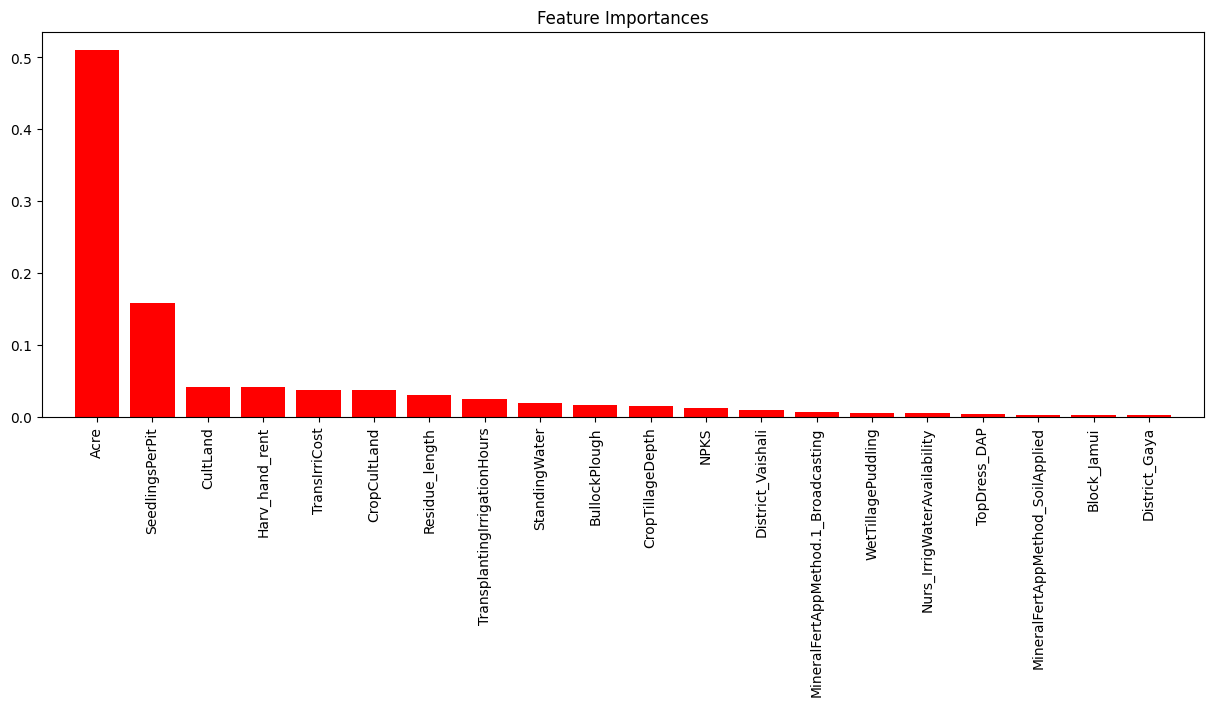

In [253]:
importances = regressor.feature_importances_

# Sort them in descending order and select the top 10
sorted_indices = np.argsort(importances)[::-1]
top_sorted_indices = sorted_indices[:20]


# Get the top feature names if available (here using dummy names)
feature_names = X_train_log.columns
top_feature_names = feature_names[top_sorted_indices]

# Plotting
plt.figure(figsize=(15, 5))
plt.title("Feature Importances")
plt.bar(range(len(top_sorted_indices)), importances[top_sorted_indices], color="r", align="center")
plt.xticks(range(len(top_sorted_indices)), top_feature_names, rotation=90)
plt.xlim([-1, len(top_sorted_indices)])
plt.show()